In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#all files
import os
files = []
for dirname, _, filenames in os.walk('{}'.format(os.getcwd())):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        
for file in files:
    if '/.' not in file and '.ipynb' not in file:
        print(file)

/Users/alejandrogalindo/my_projects/wns/test.csv
/Users/alejandrogalindo/my_projects/wns/submission0.csv
/Users/alejandrogalindo/my_projects/wns/sample_submission.csv
/Users/alejandrogalindo/my_projects/wns/train/train.csv
/Users/alejandrogalindo/my_projects/wns/train/item_data.csv
/Users/alejandrogalindo/my_projects/wns/train/view_log.csv


In [3]:
#load in the corresponding files
train=pd.read_csv('/Users/alejandrogalindo/my_projects/wns/train/train.csv')
test=pd.read_csv('/Users/alejandrogalindo/my_projects/wns/test.csv')
view=pd.read_csv('/Users/alejandrogalindo/my_projects/wns/train/view_log.csv')
item=pd.read_csv('/Users/alejandrogalindo/my_projects/wns/train/item_data.csv')
sub=pd.read_csv('/Users/alejandrogalindo/my_projects/wns/sample_submission.csv')

In [4]:
#check test and sample submission
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [5]:
sub.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0
1,caac14a5bf2ba283db7708bb34855760,0
2,13f10ba306a19ce7bec2f3cae507b698,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,0
4,bf5a572cca75f5fc67f4b14e58b11d70,0


In [6]:
# EDA train
print(train.shape)
train.head()

(237609, 7)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [7]:
#check unique values for each of the columns
for column in train.columns:
    print('{}: ({},{})'.format(column, train[column].nunique(), train[column].dtype))

impression_id: (237609,object)
impression_time: (36461,object)
user_id: (74723,int64)
app_code: (490,int64)
os_version: (3,object)
is_4G: (2,int64)
is_click: (2,int64)


In [8]:
#checking for null or missing values
train.isnull().sum()

impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

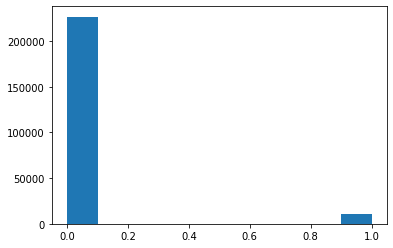

In [9]:
#check for distribution of the target variable
plt.hist(x = train.is_click)
plt.show()

In [10]:
#EDA item ##########################
print(item.shape)
item.head()

(132761, 6)


,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [11]:
item.isnull().sum()

item_id         0
item_price      0
category_1      0
category_2      0
category_3      0
product_type    0
dtype: int64

In [12]:
#check unique values for each of the columns of item
for column in item.columns:
    print('{}: ({},{})'.format(column, item[column].nunique(), item[column].dtype))

item_id: (132761,int64)
item_price: (13531,int64)
category_1: (17,int64)
category_2: (79,int64)
category_3: (335,int64)
product_type: (7959,int64)


In [13]:
#EDA view ##########################
print(view.shape)
view.head()

(3118622, 5)


,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [14]:
view.isnull().sum()

server_time    0
device_type    0
session_id     0
user_id        0
item_id        0
dtype: int64

In [15]:
#check unique values for each of the columns of view
for column in view.columns:
    print('{}: ({},{})'.format(column, view[column].nunique(), view[column].dtype))

server_time: (82840,object)
device_type: (3,object)
session_id: (1014970,int64)
user_id: (89157,int64)
item_id: (126708,int64)


- As of now there are no missing or null values in any dataset
- The target variable is very much imbalanced, I'll account forthat laterin the model creation
- Next thing will be to join the view and item datasets
- For feature engineering in this combined dataset I will creted new features regarding the count for different combinations through time

In [16]:
#left merging on item_id 
view_item=view.merge(item,on='item_id',how='left')
view_item.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0


In [17]:
#convert the server_time colum to datime object
view_item['server_time']=pd.to_datetime(view_item['server_time'],format='%Y-%m-%d %H:%M:%S')

#sort values according to user id and server time
view_item = view_item.sort_values(['user_id','server_time'],ascending=True)
#use cumcount to count how many different sessions each user had 
view_item['cumcount_user_sess'] = view_item.groupby('user_id')['session_id'].cumcount() + 1 #starting at one (+1)

#sort values according to user_id - item_id combination through server time
view_item = view_item.sort_values(['user_id','item_id','server_time'],ascending=True)
#use cumcount to count how many different session occured for ezch user-item combination
view_item['cumcount_useritem_sess']=view_item.groupby(['user_id','item_id'])['session_id'].cumcount() + 1

#sort values according to user-item-product_type through time
view_item = view_item.sort_values(['user_id','item_id','product_type','server_time'],ascending=True)
#use cumcount to count how many different sessions occured for each user-item-product combination
view_item['cumcount_useritemprod_sess']=view_item.groupby(['user_id','session_id','item_id'])['session_id'].cumcount() + 1

#change the type of columns to category as needed
view_item['device_type']=view_item['device_type'].astype('category')
view_item['session_id']=view_item['session_id'].astype('category')
view_item['item_id']=view_item['item_id'].astype('category')
view_item['device_type']=view_item['device_type'].astype('category')

#drop server time as it will be of no use from now 
view_item.drop(['server_time'],axis=1,inplace=True)

In [18]:
view_item.head()


,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type,cumcount_user_sess,cumcount_useritem_sess,cumcount_useritemprod_sess
2709080,android,968970,0,1751,2227.0,14.0,61.0,159.0,1694.0,34,1,1
1355387,android,143955,0,2715,1601.0,14.0,61.0,159.0,7093.0,18,1,1
1355488,android,143955,0,2715,1601.0,14.0,61.0,159.0,7093.0,19,2,2
1355056,android,143955,0,10379,1238.0,16.0,17.0,272.0,60.0,12,1,1
1355084,android,143955,0,10379,1238.0,16.0,17.0,272.0,60.0,13,2,2


In [19]:
#check unique values for each of the columns of view_item
for column in view_item.columns:
    print('{}: ({},{})'.format(column, view_item[column].nunique(), view_item[column].dtype))

device_type: (3,category)
session_id: (1014970,category)
user_id: (89157,int64)
item_id: (126708,category)
item_price: (13207,float64)
category_1: (17,float64)
category_2: (79,float64)
category_3: (335,float64)
product_type: (7846,float64)
cumcount_user_sess: (2906,int64)
cumcount_useritem_sess: (234,int64)
cumcount_useritemprod_sess: (52,int64)


In [20]:
#engineer some categorical features to be dummy variables
view_item = pd.get_dummies(view_item,columns=['device_type', 'category_1', 'category_2'],drop_first=True)
print(view_item.shape)
view_item.head()

(3118622, 105)


,session_id,user_id,item_id,item_price,category_3,product_type,cumcount_user_sess,cumcount_useritem_sess,cumcount_useritemprod_sess,device_type_iphone,...,category_2_70.0,category_2_71.0,category_2_72.0,category_2_73.0,category_2_74.0,category_2_75.0,category_2_76.0,category_2_77.0,category_2_78.0,category_2_79.0
2709080,968970,0,1751,2227.0,159.0,1694.0,34,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1355387,143955,0,2715,1601.0,159.0,7093.0,18,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1355488,143955,0,2715,1601.0,159.0,7093.0,19,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1355056,143955,0,10379,1238.0,272.0,60.0,12,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1355084,143955,0,10379,1238.0,272.0,60.0,13,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#create several new features to supoort the view item dataset, each depending on the type of data
cat_agg=['count','nunique']
num_agg=['min','mean','max','sum']
agg_col={
    'session_id':cat_agg, 'item_id':cat_agg,'item_price':num_agg,
       'category_3':['count','nunique','mean'], 'product_type':['count','nunique','mean']
}

for column in view_item.columns:
    if column.startswith('category_1') or column.startswith('category_2'):
        agg_col[column]=['sum','mean']
    elif column.startswith('server'):
        agg_col[column]=cat_agg
    elif column.startswith('cumcount'):
        agg_col[column]=num_agg

In [22]:
#aggregate the corresponding column on user id 
agg_view_item=view_item.groupby('user_id').agg(agg_col)

In [23]:
#each of the columns has its own summary statistics to better help the model
print(agg_view_item.shape)
agg_view_item.head()

(89157, 214)


session_id         item_id         item_price                          \
             count nunique   count nunique        min          mean       max   
user_id                                                                         
0               42      11      42      18      332.0   9395.666667   92160.0   
1                8       3       8       8      383.0   3946.750000   12595.0   
2              165      37     165     130      128.0  14809.509091  281536.0   
3                8       1       8       3      537.0   7257.375000   16640.0   
4                2       1       2       2     1977.0  30114.500000   58252.0   

                   category_3          ... category_2_75.0       \
               sum      count nunique  ...             sum mean   
user_id                                ...                        
0         394618.0         42      16  ...               0  0.0   
1          31574.0          8       7  ...               0  0.0   
2        2443569.0        165      82  ...               0  0.0   
3          58059.0          8       3  ...               0  0.0   
4          60229.0          2       2  ...               0  0.0   

        category_2_76.0           category_2_77.0           category_2_78.0  \
                    sum      mean             sum      mean             sum   
user_id                                                                       
0                     0  0.000000               0  0.000000               0   
1                     2  0.250000               0  0.000000               1   
2                     3  0.018182               1  0.006061               2   
3                     0  0.000000               0  0.000000               0   
4                     0  0.000000               0  0.000000               0   

                  category_2_79.0           
             mean             sum     mean  
user_id                                     
0        0.000000               1  0.02381  
1        0.125000               0  0.00000  
2        0.012121               0  0.00000  
3        0.000000               0  0.00000  
4        0.000000               0  0.00000  

[5 rows x 214 columns]

In [24]:
#transform the new dtaset to be only one set o columns
agg_view_item.columns=['vi_' + '_'.join(col).strip() for col in agg_view_item.columns.values]
agg_view_item.reset_index(inplace=True)
agg_view_item.head()

,user_id,vi_session_id_count,vi_session_id_nunique,vi_item_id_count,vi_item_id_nunique,vi_item_price_min,vi_item_price_mean,vi_item_price_max,vi_item_price_sum,vi_category_3_count,...,vi_category_2_75.0_sum,vi_category_2_75.0_mean,vi_category_2_76.0_sum,vi_category_2_76.0_mean,vi_category_2_77.0_sum,vi_category_2_77.0_mean,vi_category_2_78.0_sum,vi_category_2_78.0_mean,vi_category_2_79.0_sum,vi_category_2_79.0_mean
0,0,42,11,42,18,332.0,9395.666667,92160.0,394618.0,42,...,0,0.0,0,0.000000,0,0.000000,0,0.000000,1,0.02381
1,1,8,3,8,8,383.0,3946.750000,12595.0,31574.0,8,...,0,0.0,2,0.250000,0,0.000000,1,0.125000,0,0.00000
2,2,165,37,165,130,128.0,14809.509091,281536.0,2443569.0,165,...,0,0.0,3,0.018182,1,0.006061,2,0.012121,0,0.00000
3,3,8,1,8,3,537.0,7257.375000,16640.0,58059.0,8,...,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.00000
4,4,2,1,2,2,1977.0,30114.500000,58252.0,60229.0,2,...,0,0.0,0,0.000000,0,0.000000,0,0.000000,0,0.00000


In [25]:
#release memory space
del view_item
import gc 
gc.collect()

2989

In [26]:
#feature engineer the training set
all_data = pd.concat([train,test])
print(all_data.shape)
all_data.head()

(328284, 7)


/Users/alejandrogalindo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,app_code,impression_id,impression_time,is_4G,is_click,os_version,user_id
0,422,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,0,0.0,old,87862
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,1,1.0,latest,63410
2,259,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,1,0.0,intermediate,71748
3,244,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,1,0.0,latest,69209
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,0,0.0,latest,62873


In [27]:
#show summary statistics of each of the columns in all_data
all_data.describe()

,app_code,is_4G,is_click,user_id
count,328284.000000,328284.000000,237609.000000,328284.000000
mean,250.672631,0.360362,0.045714,46444.357724
std,134.742091,0.480106,0.208864,26811.701121
min,0.000000,0.000000,0.000000,0.000000
25%,169.750000,0.000000,0.000000,23158.000000
50%,213.000000,0.000000,0.000000,46591.500000
75%,385.000000,1.000000,0.000000,69699.000000
max,522.000000,1.000000,1.000000,92586.000000


In [28]:
#one-hot encode os_version feature
all_data = pd.get_dummies(all_data,columns=['os_version'],drop_first=True)

In [29]:
#drop impression_time as it will be of no use regarding the model
all_data.drop(['impression_time'],axis=1,inplace=True)

In [30]:
#merge agg_view_item on user_id
all_data = all_data.merge(agg_view_item,on='user_id',how='left')
print(all_data.shape)
all_data.head()

(328284, 221)


,app_code,impression_id,is_4G,is_click,user_id,os_version_latest,os_version_old,vi_session_id_count,vi_session_id_nunique,vi_item_id_count,...,vi_category_2_75.0_sum,vi_category_2_75.0_mean,vi_category_2_76.0_sum,vi_category_2_76.0_mean,vi_category_2_77.0_sum,vi_category_2_77.0_mean,vi_category_2_78.0_sum,vi_category_2_78.0_mean,vi_category_2_79.0_sum,vi_category_2_79.0_mean
0,422,c4ca4238a0b923820dcc509a6f75849b,0,0.0,87862,0,1,1,1,1,...,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,1,1.0,63410,1,0,12,7,12,...,0,0.0,1,0.083333,0,0.0,0,0.0,0,0.0
2,259,70efdf2ec9b086079795c442636b55fb,1,0.0,71748,0,0,2,2,2,...,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0
3,244,8e296a067a37563370ded05f5a3bf3ec,1,0.0,69209,1,0,18,7,18,...,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,0,0.0,62873,1,0,46,24,46,...,0,0.0,1,0.021739,0,0.0,0,0.0,0,0.0


In [31]:
from sklearn.model_selection import KFold

#mean target encoding
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature


In [32]:
#split dataset into train and test
train=all_data[all_data['is_click'].isnull()==False].copy()
test=all_data[all_data['is_click'].isnull()==True].copy()

In [33]:
train.head()

,app_code,impression_id,is_4G,is_click,user_id,os_version_latest,os_version_old,vi_session_id_count,vi_session_id_nunique,vi_item_id_count,...,vi_category_2_75.0_sum,vi_category_2_75.0_mean,vi_category_2_76.0_sum,vi_category_2_76.0_mean,vi_category_2_77.0_sum,vi_category_2_77.0_mean,vi_category_2_78.0_sum,vi_category_2_78.0_mean,vi_category_2_79.0_sum,vi_category_2_79.0_mean
0,422,c4ca4238a0b923820dcc509a6f75849b,0,0.0,87862,0,1,1,1,1,...,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,1,1.0,63410,1,0,12,7,12,...,0,0.0,1,0.083333,0,0.0,0,0.0,0,0.0
2,259,70efdf2ec9b086079795c442636b55fb,1,0.0,71748,0,0,2,2,2,...,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0
3,244,8e296a067a37563370ded05f5a3bf3ec,1,0.0,69209,1,0,18,7,18,...,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,0,0.0,62873,1,0,46,24,46,...,0,0.0,1,0.021739,0,0.0,0,0.0,0,0.0


In [34]:
#regarding the app_code and the user id in the all_data set I will use mean encodings to encode them
train['appcode_enc'], test['appcode_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='is_click',
                                                                     categorical='app_code',
                                                                     alpha=10)


In [35]:
#regarding the app_code and the user id in the all_data set I will use mean encodings to encode them
train['userid_enc'], test['userid_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='is_click',
                                                                     categorical='user_id',
                                                                     alpha=10)

In [36]:
#regarding the impression id I will create a count for every user id, both for the train and the test set
train_impression_count = train.groupby('user_id')['impression_id'].count().reset_index()
test_impression_count = test.groupby('user_id')['impression_id'].count().reset_index()

#left merging the corresponding count to its user id
train = train.merge(train_impression_count, on = 'user_id', how = 'left')
test = test.merge(test_impression_count, on = 'user_id', how = 'left')

In [37]:
train.head()

,app_code,impression_id_x,is_4G,is_click,user_id,os_version_latest,os_version_old,vi_session_id_count,vi_session_id_nunique,vi_item_id_count,...,vi_category_2_76.0_mean,vi_category_2_77.0_sum,vi_category_2_77.0_mean,vi_category_2_78.0_sum,vi_category_2_78.0_mean,vi_category_2_79.0_sum,vi_category_2_79.0_mean,appcode_enc,userid_enc,impression_id_y
0,422,c4ca4238a0b923820dcc509a6f75849b,0,0.0,87862,0,1,1,1,1,...,0.000000,0,0.0,0,0.0,0,0.0,0.136099,0.041564,3
1,467,45c48cce2e2d7fbdea1afc51c7c6ad26,1,1.0,63410,1,0,12,7,12,...,0.083333,0,0.0,0,0.0,0,0.0,0.051504,0.096951,52
2,259,70efdf2ec9b086079795c442636b55fb,1,0.0,71748,0,0,2,2,2,...,0.000000,0,0.0,0,0.0,0,0.0,0.053448,0.028336,9
3,244,8e296a067a37563370ded05f5a3bf3ec,1,0.0,69209,1,0,18,7,18,...,0.000000,0,0.0,0,0.0,0,0.0,0.124313,0.035170,4
4,473,182be0c5cdcd5072bb1864cdee4d3d6e,0,0.0,62873,1,0,46,24,46,...,0.021739,0,0.0,0,0.0,0,0.0,0.052615,0.020782,16


In [38]:
test.head()

,app_code,impression_id_x,is_4G,is_click,user_id,os_version_latest,os_version_old,vi_session_id_count,vi_session_id_nunique,vi_item_id_count,...,vi_category_2_76.0_mean,vi_category_2_77.0_sum,vi_category_2_77.0_mean,vi_category_2_78.0_sum,vi_category_2_78.0_mean,vi_category_2_79.0_sum,vi_category_2_79.0_mean,appcode_enc,userid_enc,impression_id_y
0,127,a9e7126a585a69a32bc7414e9d0c0ada,1,NaN,44754,1,0,1,1,1,...,0.000000,0,0.0,0,0.000000,0,0.0,0.053168,0.045714,10
1,44,caac14a5bf2ba283db7708bb34855760,0,NaN,29656,1,0,72,25,72,...,0.000000,0,0.0,3,0.041667,0,0.0,0.006303,0.028571,3
2,296,13f10ba306a19ce7bec2f3cae507b698,1,NaN,25234,1,0,9,6,9,...,0.000000,0,0.0,0,0.000000,0,0.0,0.076974,0.045714,2
3,207,39c4b4dc0e9701b55a0a4f072008fb3f,1,NaN,22988,1,0,37,12,37,...,0.027027,0,0.0,0,0.000000,0,0.0,0.014275,0.026890,6
4,242,bf5a572cca75f5fc67f4b14e58b11d70,1,NaN,35431,1,0,28,18,28,...,0.000000,0,0.0,1,0.035714,0,0.0,0.098504,0.148571,3


In [39]:
#drop unnecessary columns
train.drop(['impression_id_x'], axis = 1, inplace = True)
test.drop(['impression_id_x'], axis = 1, inplace = True)

In [40]:
test.isnull().sum().sort_values(ascending = False).head(10)

is_click                  90675
vi_category_3_mean            3
vi_product_type_mean          3
vi_item_price_max             3
vi_item_price_mean            3
vi_item_price_min             3
vi_category_2_6.0_mean        0
vi_category_2_5.0_mean        0
vi_category_2_6.0_sum         0
impression_id_y               0
dtype: int64

In [41]:
train.isnull().sum().sort_values(ascending = False).head(10)

vi_product_type_mean      3
vi_item_price_max         3
vi_item_price_mean        3
vi_item_price_min         3
vi_category_3_mean        3
impression_id_y           0
vi_category_2_6.0_sum     0
vi_category_2_5.0_sum     0
vi_category_2_5.0_mean    0
vi_category_2_6.0_mean    0
dtype: int64

In [42]:
#take care of the rest of the missing values
test = test.drop(['is_click'], axis = 1)
train.dropna(inplace = True)
test['vi_product_type_mean'] = test.fillna(test['vi_product_type_mean'].mean())
test['vi_item_price_max'] = test.fillna(test['vi_item_price_max'].mean())
test['vi_item_price_min'] = test.fillna(test['vi_item_price_min'].mean())
test['vi_item_price_mean'] = test.fillna(test['vi_item_price_mean'].mean())
test['vi_category_3_mean'] = test.fillna(test['vi_category_3_mean'].mean())

In [43]:
test.isnull().sum().sort_values(ascending = False).head(10)

impression_id_y           0
vi_category_2_4.0_sum     0
vi_category_2_9.0_mean    0
vi_category_2_9.0_sum     0
vi_category_2_8.0_mean    0
vi_category_2_8.0_sum     0
vi_category_2_7.0_mean    0
vi_category_2_7.0_sum     0
vi_category_2_6.0_mean    0
vi_category_2_6.0_sum     0
dtype: int64

In [44]:
train.isnull().sum().sort_values(ascending = False).head(10)

impression_id_y           0
vi_category_2_3.0_mean    0
vi_category_2_9.0_sum     0
vi_category_2_8.0_mean    0
vi_category_2_8.0_sum     0
vi_category_2_7.0_mean    0
vi_category_2_7.0_sum     0
vi_category_2_6.0_mean    0
vi_category_2_6.0_sum     0
vi_category_2_5.0_mean    0
dtype: int64

In [45]:
test.shape

(90675, 222)

In [46]:
#split in to train, test 
X = train.drop('is_click',axis=1)
y = train['is_click']

In [47]:
X.head()

,app_code,is_4G,user_id,os_version_latest,os_version_old,vi_session_id_count,vi_session_id_nunique,vi_item_id_count,vi_item_id_nunique,vi_item_price_min,...,vi_category_2_76.0_mean,vi_category_2_77.0_sum,vi_category_2_77.0_mean,vi_category_2_78.0_sum,vi_category_2_78.0_mean,vi_category_2_79.0_sum,vi_category_2_79.0_mean,appcode_enc,userid_enc,impression_id_y
0,422,0,87862,0,1,1,1,1,1,2350.0,...,0.000000,0,0.0,0,0.0,0,0.0,0.136099,0.041564,3
1,467,1,63410,1,0,12,7,12,7,1024.0,...,0.083333,0,0.0,0,0.0,0,0.0,0.051504,0.096951,52
2,259,1,71748,0,0,2,2,2,2,973.0,...,0.000000,0,0.0,0,0.0,0,0.0,0.053448,0.028336,9
3,244,1,69209,1,0,18,7,18,12,249.0,...,0.000000,0,0.0,0,0.0,0,0.0,0.124313,0.035170,4
4,473,0,62873,1,0,46,24,46,34,288.0,...,0.021739,0,0.0,0,0.0,0,0.0,0.052615,0.020782,16


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237606 entries, 0 to 237608
Columns: 222 entries, app_code to impression_id_y
dtypes: float64(110), int64(21), uint8(91)
memory usage: 259.9 MB


In [49]:
for column in X.columns:
    X[column] = X[column].astype('float')

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237606 entries, 0 to 237608
Columns: 222 entries, app_code to impression_id_y
dtypes: float64(222)
memory usage: 404.3 MB


In [51]:
y[0:3]

0    0.0
1    1.0
2    0.0
Name: is_click, dtype: float64

## Model creation

- After all the preprocessing and Feture engineering is done, a machine learning model will be created in order to predict the click 
- In this section I will be attending the problem of the imabalance dataset

In [52]:
#import necessary librarties for model creatyion
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import roc_auc_score

/Users/alejandrogalindo/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [53]:
#use train test split get a validation set 
#using the stratify hyperparameter to address the imbalancedness of the data
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 42,stratify=y)

In [54]:
X.shape

(237606, 222)

In [55]:
y.shape

(237606,)

In [56]:
#LGBM model 
LGBM=LGBMClassifier(n_estimators=3000,random_state=42,learning_rate=0.03,colsample_bytree=0.2,
                         objective='binary' ,scale_pos_weight=1)
LGBM.fit(X_train,y_train,eval_set=[(X_val, y_val)],eval_metric='auc', early_stopping_rounds=200,
              verbose=200)

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.750468	valid_0's binary_logloss: 0.167518
[400]	valid_0's auc: 0.751026	valid_0's binary_logloss: 0.167284
Early stopping, best iteration is:
[292]	valid_0's auc: 0.75129	valid_0's binary_logloss: 0.167269


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.2,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [57]:
preds=LGBM.predict_proba(X_val)[:,-1]
print("LGBM AUC score: ",roc_auc_score(y_val,preds))

LGBM AUC score:  0.7512895723733932


In [58]:
#predict on the test set
final_preds = LGBM.predict_proba(test)[:,-1]
print(final_preds.shape)

(90675,)


In [59]:
#glimpse of final preds
final_preds

array([0.02249108, 0.01164455, 0.05336533, ..., 0.02271533, 0.10860807,
       0.17388088])

In [60]:
#append predictions to submission
sub['is_click'] = list(final_preds)
sub.head(15)

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.022491
1,caac14a5bf2ba283db7708bb34855760,0.011645
2,13f10ba306a19ce7bec2f3cae507b698,0.053365
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.012524
4,bf5a572cca75f5fc67f4b14e58b11d70,0.161709
5,ca09514449e304fee91456fb0918667a,0.012524
6,b8b35cb0ae1719aa9f0ba7a9f3785687,0.073082
7,33502d1e85818b9b3414c8c006c34e07,0.014683
8,5314e09fb680c56b58eb5a3b5b7bce0c,0.076557
9,e1a8a26385f49a5a7e04d34a5823bff3,0.013564
